## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [665]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [666]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [667]:
#Connect with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [668]:
#Loading csv file in DataFrame
df=pd.read_csv('/content/drive/MyDrive/AIML_Great_Learning/Machine_Learning/AI-Project/Loan_Modelling.csv')

####Create copy of data and keep original

In [669]:
data = df.copy()

## Data Overview

* Observations
* Sanity checks

####View first 5 and last 5 rows

In [670]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [671]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


####Shape of data

In [672]:
data.shape

(5000, 14)

####Check the data types of the columns for the dataset

In [673]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


####Checking duplicate data

In [674]:
data.duplicated().sum() #checking for duplicates

np.int64(0)

####Statistical Summary

In [675]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Age:**

We have the age for all 5000 customers.
The youngest customer is 23, and the oldest is 67.
The typical age (average and middle age) is around 45 years.
A quarter of customers are 35 or younger, and three-quarters are 55 or younger.
A fairly even spread of ages around the average.

**Experience:**

We have experience data for all 5000 customers.
Experience ranges from 1 year up to 43 years.
The typical experience (average and middle) is around 20 years.
A quarter of customers have 10 years of experience or less, and three-quarters have 30 years or less.
Similar to age, experience is also fairly evenly spread around the average.

**Income:**

We have income data for all 5000 customers.
Income goes from a low of dollar 8,000 per year to a high of dollar 224,000 per year.
The average income is dollar 73,000.This difference means that there are some customers with much higher incomes pulling the average up.
Half the customers earn dollar 64,000 or less.
Income levels are not evenly spread; many customers have lower incomes, and fewer have very high incomes.

**CCAvg (Credit Card Spending):**

We have credit card spending data for all 5000 customers.
Spending ranges from $0 per month up to dollar 10,000 per month.
The average spending is dollar 1940 per month. Similar to income, this difference suggests some customers spend a lot more than others.
Half the customers spend dollar 1500 or less on credit cards each month.
Spending amounts are very uneven; many customers spend little, and a few spend a lot.


**Mortgage:**

We have mortgage data for all 5000 customers.
Mortgage values go from dollar 0 (no mortgage) up to dollar 635,000.
The average mortgage is dollar 56,000, but the middle value is dollar 0. This clearly shows that most customers do not have a mortgage.
A quarter of customers have no mortgage.
The values are very unevenly spread, with a large group having zero mortgage and a smaller group having significant mortgages, some very large.

**Family:**

We have family size data for all 5000 customers.
Family sizes range from 1 person to 4 people.
The average family size is about 2.4 people, and the middle family size is 2.
A quarter of customers have a family size of 1, and three-quarters have a family size of 3 or less.
Family sizes are clustered around 1, 2, 3, and 4.

####Check values of variables

In [676]:
#Check unique values of each columns
data.nunique()

,0
ID,5000
Age,45
Experience,47
Income,162
ZIPCode,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal_Loan,2


##Data Preprocessing

####Checking missing values

In [677]:
##Checking missing values from data frame
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


####Dropping ID column since it does not have any relevance

In [678]:
#Dropping ID column from data since ID column is only unique number
data.drop('ID',axis=1,inplace=True)

####Fixing irrelevant values

In [679]:
#Check unique value of all variable in loop
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

Experience variable having irrelevant values like -1, -2, -3, this has to be fixed

In [680]:
#Correct the Experience value
data['Experience'].replace(-1,1,inplace=True)
data['Experience'].replace(-2,2,inplace=True)
data['Experience'].replace(-3,3,inplace=True)

In [681]:
#Verifing Experience uniqueness
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

####Mapping Education

Mapping following values

1: Undergrad

2: Graduate

3: Advanced/Professional

In [682]:
data["Education"].replace(1, "Undergraduate", inplace=True)
data["Education"].replace(2, "Graduate", inplace=True)
data["Education"].replace(3, "Professional", inplace=True)

####Feature Engineering

In [683]:
# checking the number of uniques in the zip code
data["ZIPCode"].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

First digit broadly divides the U.S. into regions, from the Northeast (0) to the far West.

Second and third digits identify a regional center facility or a large city within that region.

Forth and fifth digits specify a particular post office or delivery area within the regional center or city.

We will group them based on the first 2 digits to reduce the number of unique values in the ZIPCode column.


In [684]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print("Number of unique values if we take first two digits of ZIPCode: ",data["ZIPCode"].str[0:2].nunique()," out of ",data["ZIPCode"].nunique())
data["ZIPCode"] = data["ZIPCode"].str[0:2]

Number of unique values if we take first two digits of ZIPCode:  7  out of  467


In [685]:
#Unique values in zip
data["ZIPCode"].unique()

array(['91', '90', '94', '92', '93', '95', '96'], dtype=object)

####Converting categorical features to 'category'

In [686]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

In [687]:
data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate analysis

In [688]:
def histogram_boxplot(data, feature, figsize=(10, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [689]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

####Analysis on Age

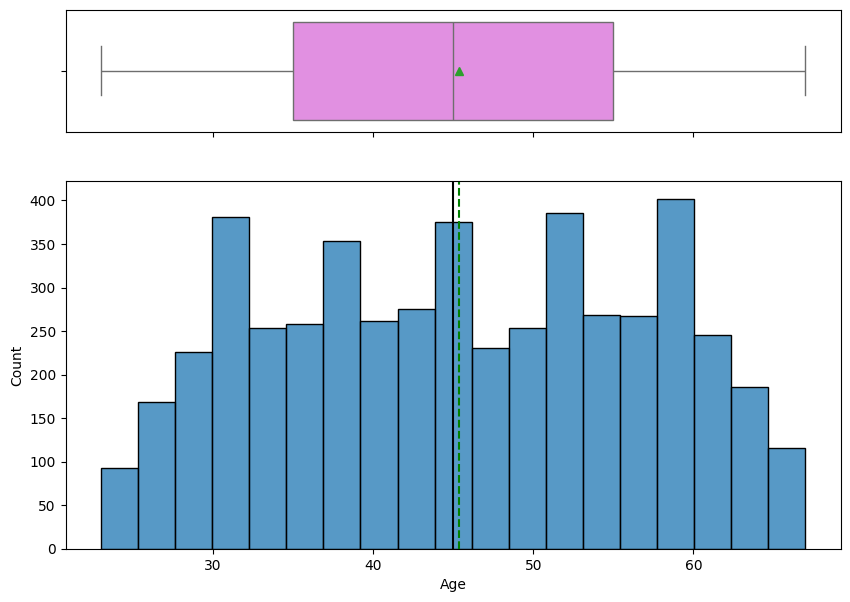

In [690]:
#Draw Box plot and Histogram for Age
histogram_boxplot(data, 'Age')

####Observation on Age:
The age distribution appears to be relatively symmetrical. Some customers have unusually high or low ages.


Analysis on Experience

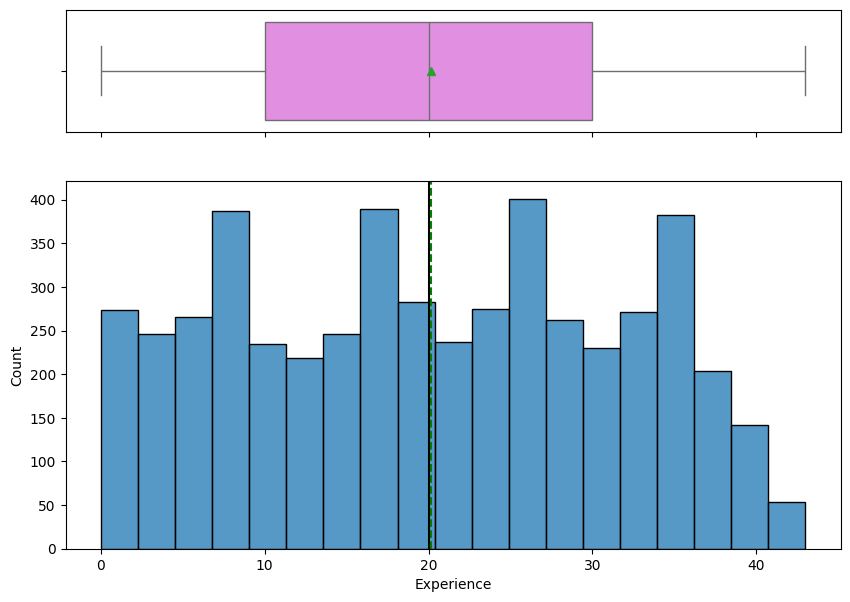

In [691]:
#Draw Box plot and Histogram for Experience
histogram_boxplot(data, 'Experience')

####Observation on Experience:
The experience distribution shows that most customers have experience between 7 to 37 years, with a few customers having significantly higher experience 40 years and greater.

####Analysis on Income

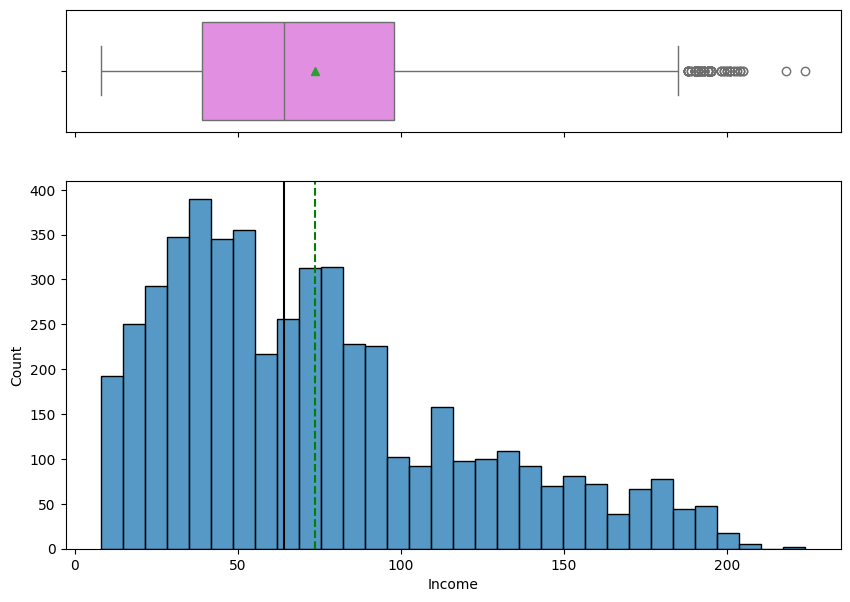

In [692]:
#Draw Box plot and Histogram for Experience
histogram_boxplot(data, 'Income')

####Observation on Income:
Most people have low income, while a small number of people have very high income and distribution is right skewed, with individuals with very high income being outliers.

####Analysis on Credit Card Usage (CCAvg)

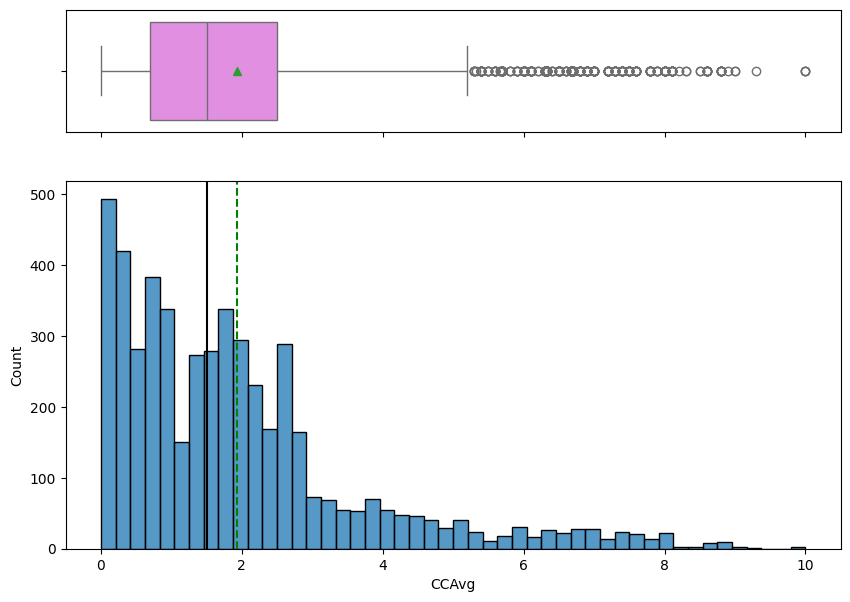

In [693]:
#Draw Box plot and Histogram for CCAvg
histogram_boxplot(data, 'CCAvg')

####Observation on Credit Card Usage (CCAvg):
The credit card usage distribution shows that most customers have relatively low credit card usage, with a few customers having significantly higher usage.

####Analysis on Mortgage

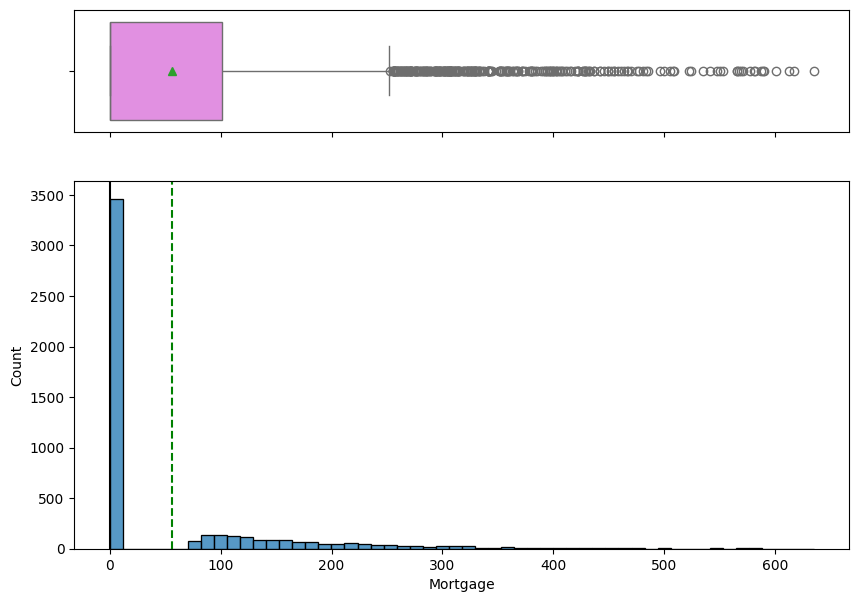

In [694]:
#Draw Box plot and Histogram for Mortgage
histogram_boxplot(data, 'Mortgage')

####Observation on Mortgage:
The mortgage distribution shows that the majority of customers do not have a mortgage while a few customers have very high mortgage values and the boxplot might show many outliers with higher mortgage values.

####Analysis on ZipCode

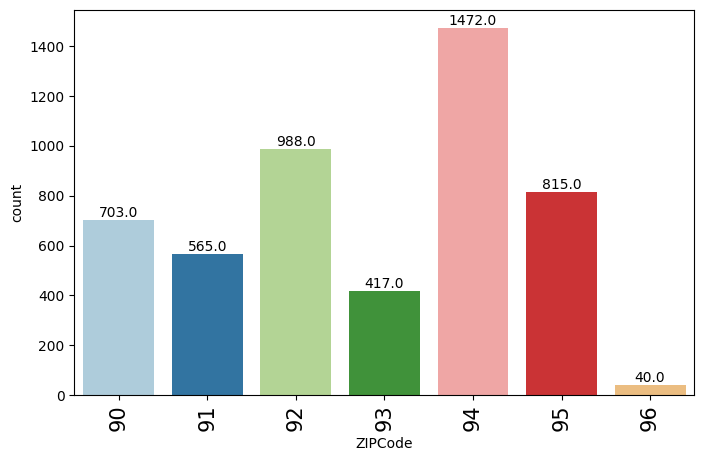

In [695]:
#Analysis on ZipCode
labeled_barplot(data, 'ZIPCode')

####Observation on ZipCode
Zip Code area 94 & 92 represent higest concentration of customers, Zip Code area 96 and 93 higest concentration of customers. With fewer customers might represent opportunities for expansion or areas where the bank has less presence.

####Analysis on Family

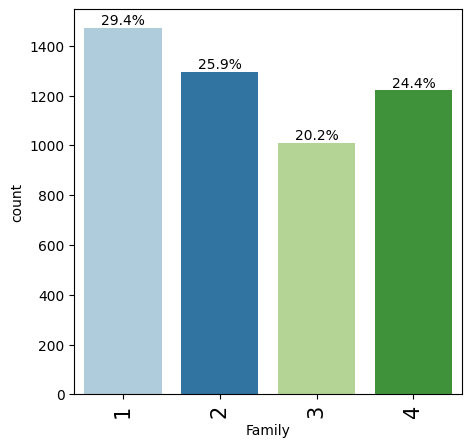

In [696]:
#Analysis on Family variable
labeled_barplot(data, 'Family', perc=True)

####Observation on Family
The analysis of the Family variable shows that the majority of customers have small families with 1 or 2 members. Approximately 29.4% of customers have a family of 1 member and around 25.9% of customers have a family of 2 members. This indicates that customers with smaller families are more than those with larger families.

####Analysis on Personal_Loan

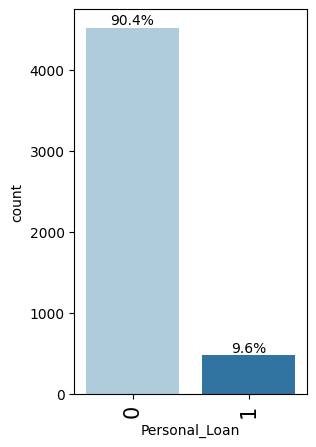

In [697]:
#Analysis on Personal_Loan
labeled_barplot(data, 'Personal_Loan', perc=True)

####Observation on Personal_Loan
Majority of customers, around 90.4%, do not have a personal loan. Only a smaller percentage, about 9.6%, have taken a personal loan.

####Analysis on Securities_Account

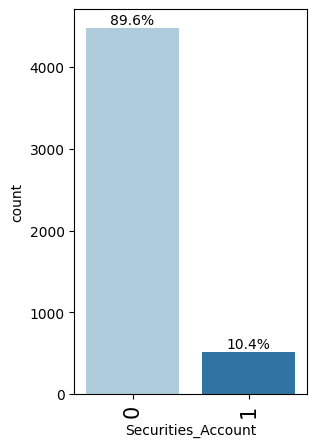

In [698]:
#Analysis on Securities_Account
labeled_barplot(data, 'Securities_Account', perc=True)

####Observation on Securities_Account
Vast majority of customers 89.6%, do not have a securities account. Only a small customer 10.4%, have a securities account.

####Analysis on CD_Account

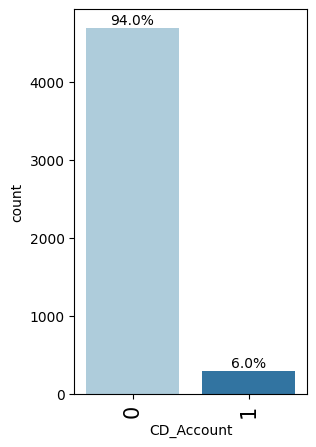

In [699]:
#Analysis on CD_Account
labeled_barplot(data, 'CD_Account', perc=True)

####Observation on CD_Account
Around 94.0%, do not have a CD account. Only a small percentage, approximately 6.0%, have a CD account.

####Analysis on Online

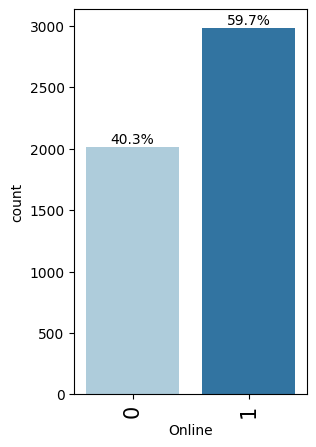

In [700]:
#Analysis on Online
labeled_barplot(data, 'Online', perc=True)

####Observation on Online
Around 59.7%, use online banking. The remaining customers, about 40.3%, do not use online banking.

####Analysis on CreditCard

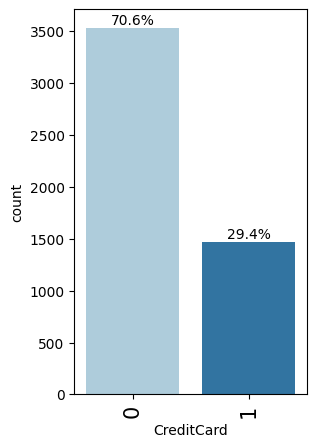

In [701]:
#Analysis on CreditCard
labeled_barplot(data, 'CreditCard', perc=True)

####Observation on CreditCard
Approximately 70.6%, have a credit card. The remaining customers, around 29.4%, do not have a credit card.

### Bivariate Analysis

In [702]:
def stacked_barplot_with_percentage(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart with percentages

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    # Determine which class to sort by. This assumes the target column has numeric or sortable values.
    # Sorting by the less frequent class (index -1) to highlight that class's distribution
    sorter_value = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter_value, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter_value, ascending=False
    )

    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))

    for c in ax.containers:
        # customize the label to your liking
        labels = [f'{w*100:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center')

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [703]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

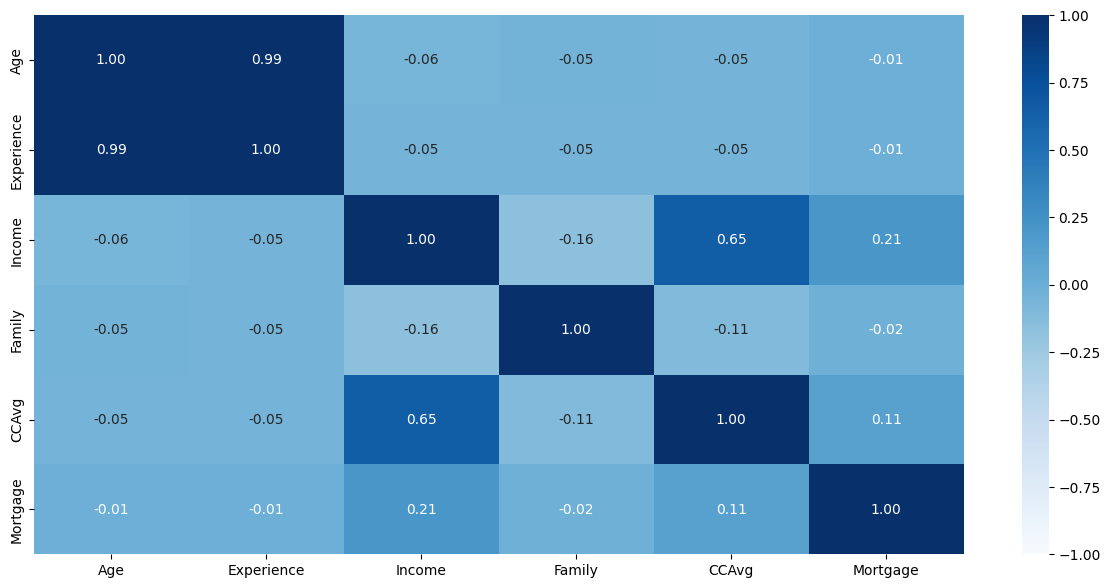

In [704]:
# Correlation plot
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Blues")
plt.show()

1. Age' and 'Experience' have a strong positive correlation: This means that as a customer's age increases, their years of professional experience also tend to increase. This is an expected relationship.
2. 'Income' and 'CCAvg' have a noticeable positive correlation: Higher income is often associated with higher average spending on credit cards.
3. Family has a negative correlation with Income, which is quite surprising as family size increases the income of the family decreases.


#### Personal_Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


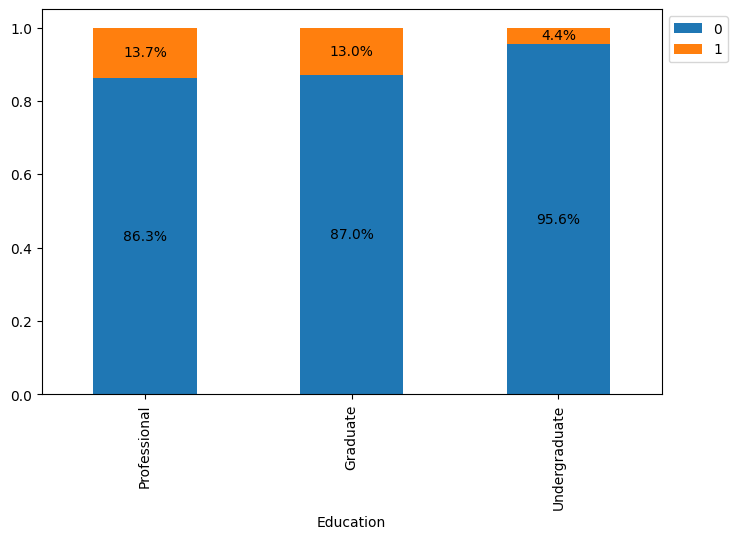

In [705]:
# Personal_Loan vs Education
stacked_barplot_with_percentage(data, 'Education', 'Personal_Loan')

A significant majority of customers with all education levels did not accept the personal loan. This is evident from the large blue portion of the bars across all education categories.

Customers with higher education levels (Graduate and Advanced/Professional) appear to have a higher proportion of personal loan acceptances compared to those with an Undergraduate degree. The percentage of people taking a loan is higher in the Graduate and Advanced/Professional categories are around 13% and 13.7% for Graduate and Advanced/Professional respectively.

The 'Professional' education level seems to have the highest proportion of customers who accepted the personal loan compared to the other two education levels.

These observations suggest that education level, particularly at the Graduate and Advanced/Professional levels, is positively associated with a customer's likelihood of accepting a personal loan.

####Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


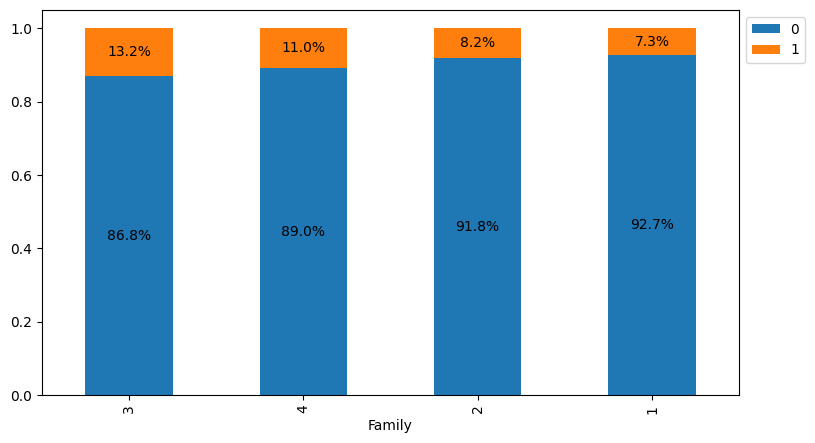

In [706]:
#Personal_Loan vs Family
stacked_barplot_with_percentage(data, 'Family', 'Personal_Loan')

For all family sizes, the majority of customers did not accept the personal loan. This is consistent with the overall distribution of the Personal_Loan variable, where most customers do not have a personal loan.

Customers with a family size of 3 have the highest percentage of personal loan acceptance.

Customers with a family size of 4 have the second highest percentage of personal loan acceptance.

Customers with family sizes of 1 and 2 have a lower percentage of personal loan acceptance compared to those with family sizes of 3 and 4.

This suggests that customers with larger family sizes (specifically 3 and 4) are more likely to accept a personal loan offer from the bank.

####Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


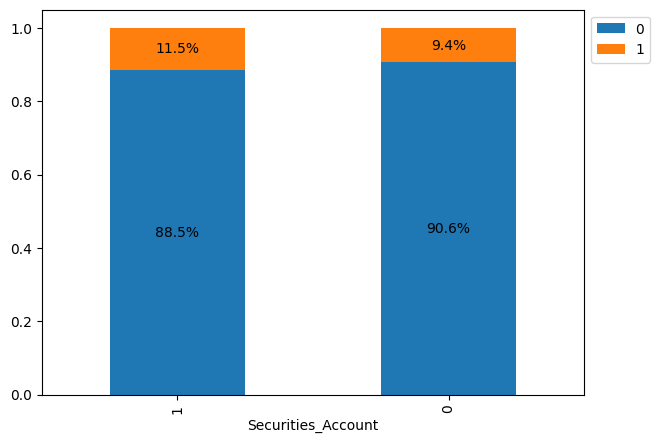

In [707]:
#Personal_Loan vs Securities_Account
stacked_barplot_with_percentage(data, 'Securities_Account', 'Personal_Loan')

A vast majority of customers, both those with and without a Securities Account, did not accept the personal loan. A small percentage of this large group accepted a personal loan.

Customers who do have a Securities Account represent a much smaller group, but within this group, the percentage of customers who accepted a personal loan is slightly higher than the percentage among those who do not have a Securities Account.

This indicates that while having a Securities Account might be weakly associated with a likelihood of accepting a personal loan, the presence or absence of a Securities Account does not appear to be a strong predictor of personal loan acceptance, as the vast majority in both groups still did not take a loan.

####Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


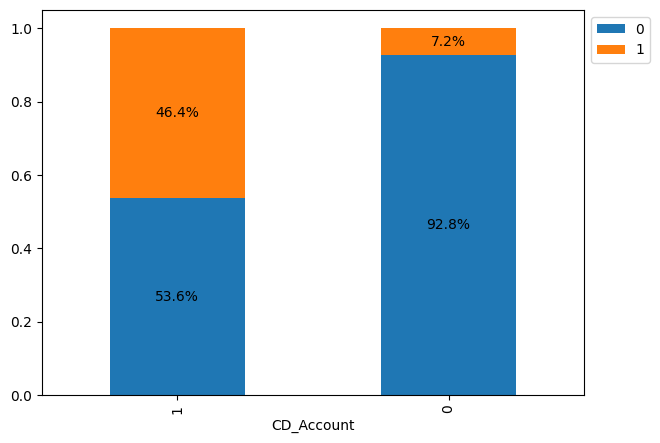

In [708]:
#Personal_Loan vs CD_Account
stacked_barplot_with_percentage(data, 'CD_Account', 'Personal_Loan')

Very large proportion of customers did not accept the personal loan.

A small percentage of this group accepted a personal loan who do not have a CD Account.

Customers who do have a CD Account , there is a significantly higher percentage of customers who accepted the personal loan compared to those without a CD Account.

This indicates that having a CD Account is a strong positive indicator for personal loan acceptance. Customers who hold a CD Account with the bank are considerably more likely to take out a personal loan.

####Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


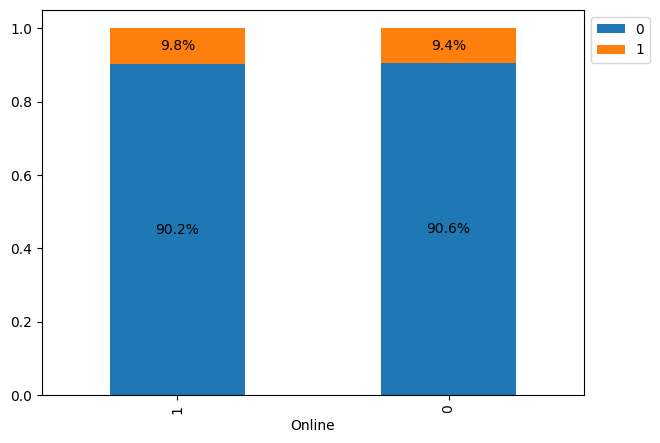

In [709]:
#Personal_Loan vs Online
stacked_barplot_with_percentage(data, 'Online', 'Personal_Loan')

For both customers who use online banking and those who do not, the vast majority did not accept the personal loan.

####Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


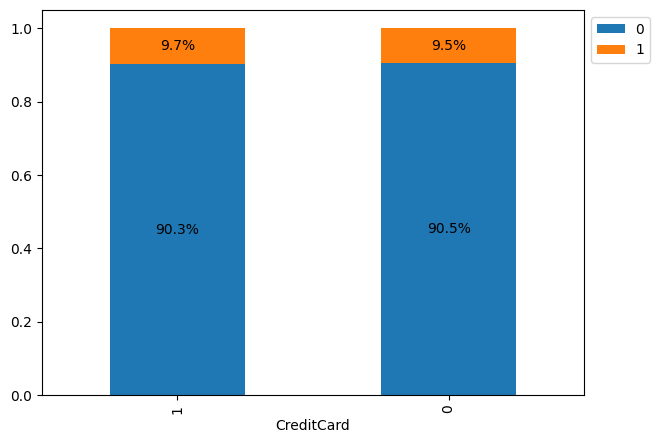

In [710]:
#Personal_Loan vs CreditCard
stacked_barplot_with_percentage(data, 'CreditCard', 'Personal_Loan')

For both customers who have a credit card and those who do not, the overwhelming majority did not accept the personal loan.

This suggests that having a credit card lower likelihood of accepting a personal loan from Bank. Therefore, Credit Card ownership doesn't appear to be a very strong predictor of personal loan acceptance.


####Personal_Loan vs ZIPCode

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


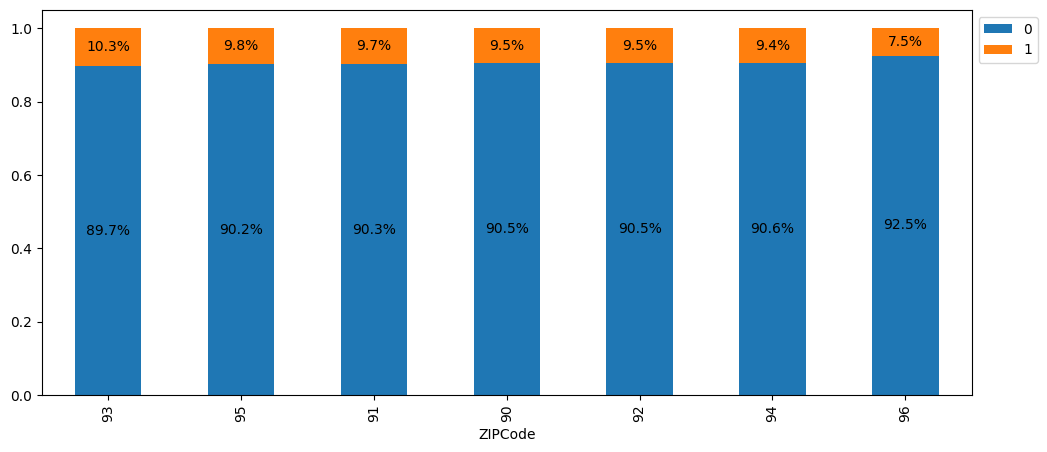

In [711]:
#Personal_Loan vs ZIPCode
stacked_barplot_with_percentage(data, 'ZIPCode', 'Personal_Loan')

For nearly all ZIP Code areas, the vast majority of customers did not accept the personal loan. This is consistent with the overall low percentage of personal loan acceptances in the dataset.

This suggests that while ZIP Code alone might not be a primary driver of personal loan acceptance.

#### Personal Loan vs Age

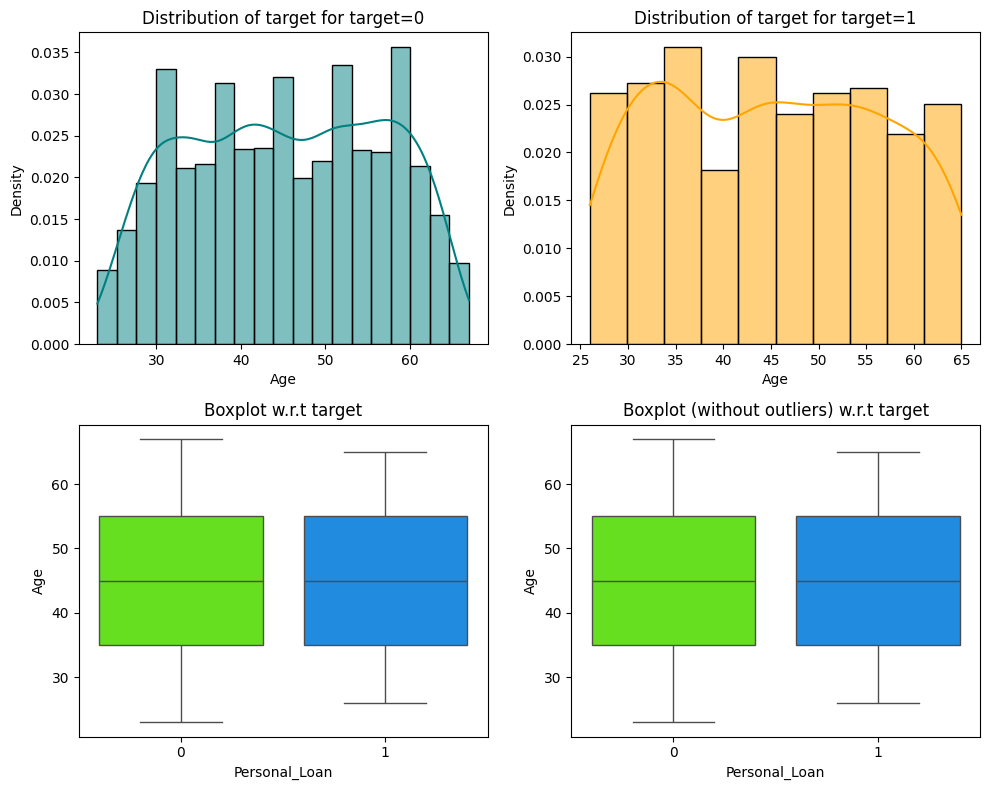

In [712]:
# Personal Loan vs Age
distribution_plot_wrt_target(data, 'Age', 'Personal_Loan')

The histograms for both groups (Personal_Loan=0 and Personal_Loan=1) show a somewhat similar distribution of age, some peaks around the middle ages.
It is not clear who took the loan and those who didn't just by looking at the distribution shapes.

The box plots for Personal_Loan vs Age suggest that there is no clear linear relationship or significant difference in the  age.

This visualization shows that age does not seem to be a strong differentiating factor in predicting whether a customer will accept a personal loan or not. Both younger and older customers appear to have similar potentials to take out a loan.

#### Personal_Loan vs Income

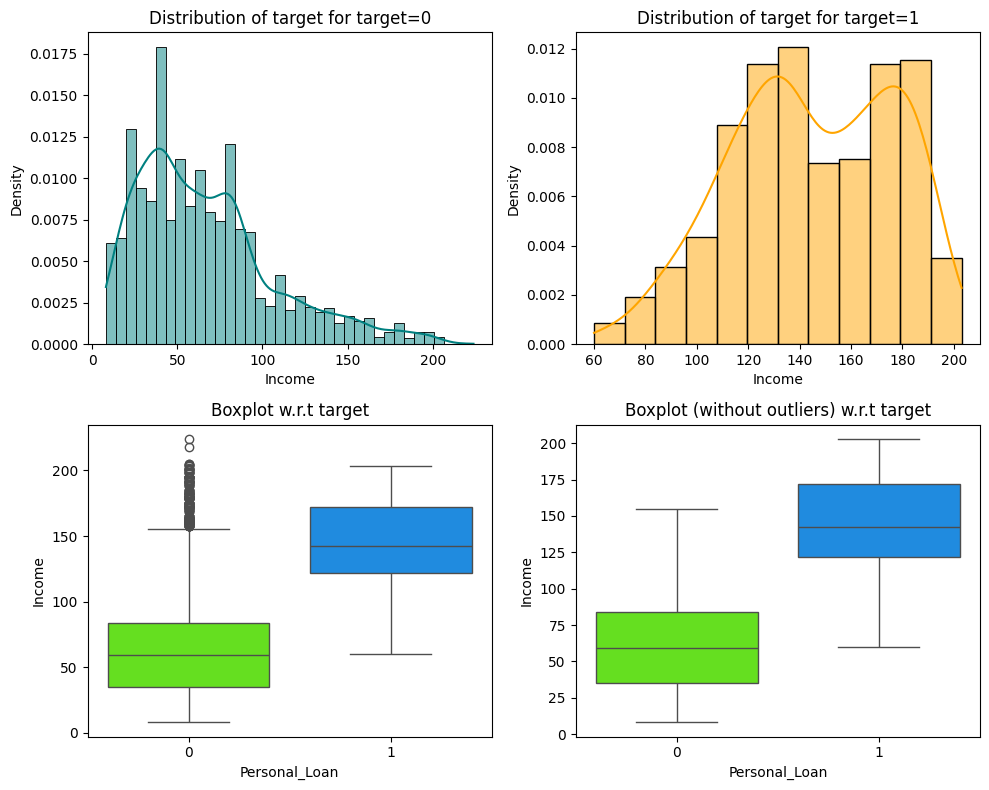

In [713]:
#Personal_Loan vs Income
distribution_plot_wrt_target(data, 'Income', 'Personal_Loan')

This visualization strongly suggests that Income is a very strong predictor of whether a customer will accept a personal loan. Customers with higher incomes are significantly more likely to accept a loan offer.

####Personal Loan vs Experience

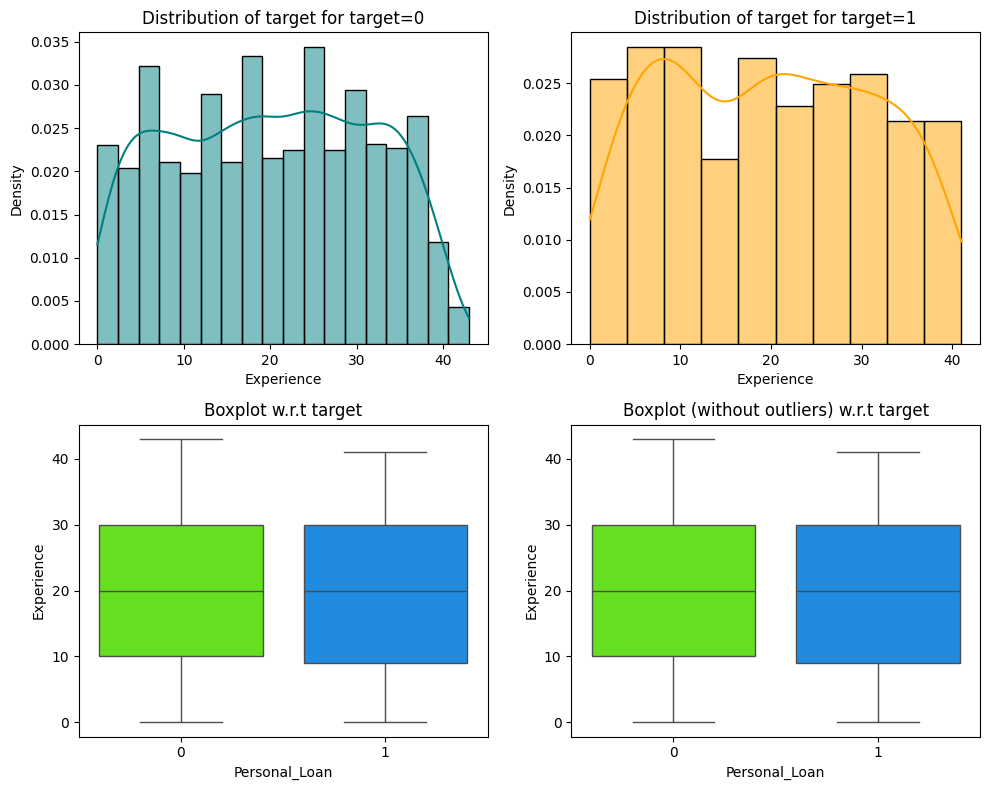

In [714]:
#Personal Loan vs Experience
distribution_plot_wrt_target(data, 'Experience', 'Personal_Loan')

This visualization suggests that Experience does not appear to be a strong differentiating factor in predicting whether a customer will accept a personal loan.

####Personal Loan vs CCAvg

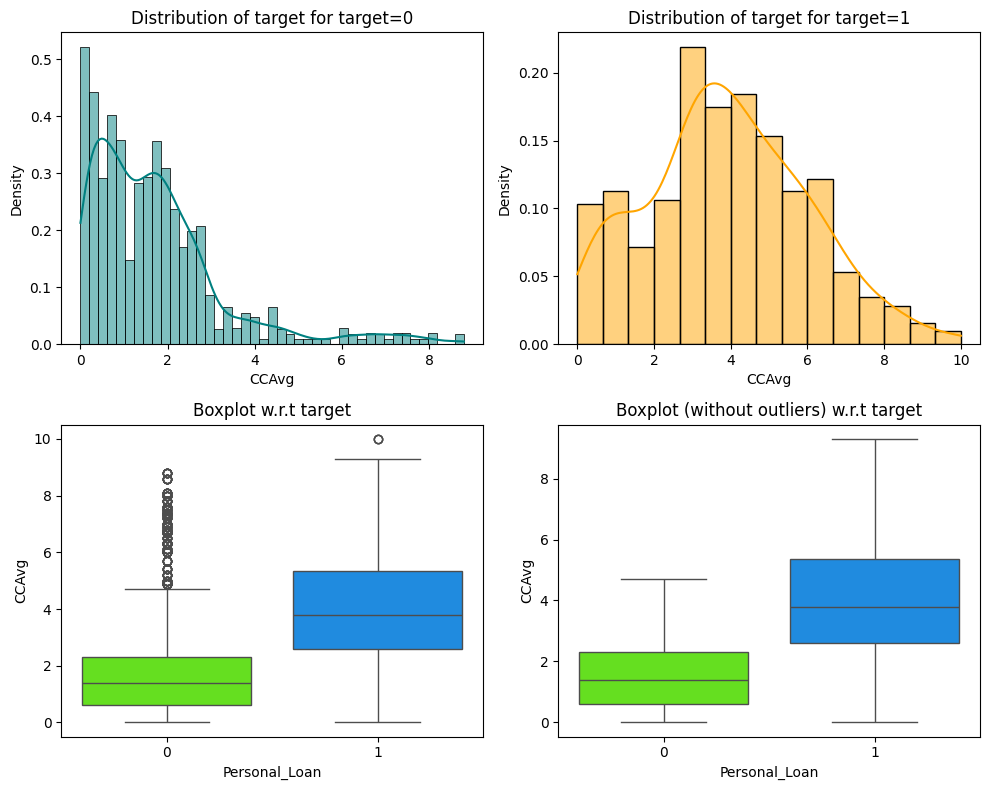

In [715]:
#Personal Loan vs CCAvg
distribution_plot_wrt_target(data, 'CCAvg', 'Personal_Loan')

This visualization indicates that CCAvg is a significant factor associated with personal loan acceptance. Customers who spend more on their credit cards on average are more likely to accept a personal loan offer. This aligns with the positive correlation observed between Income and CCAvg and the strong relationship between Income and Personal Loan.

##Questions
1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?**

**Answer:** The mortgage distribution shows that the majority of customers do not have a mortgage while a few customers have very high mortgage values and the boxplot might show many outliers with higher mortgage values.

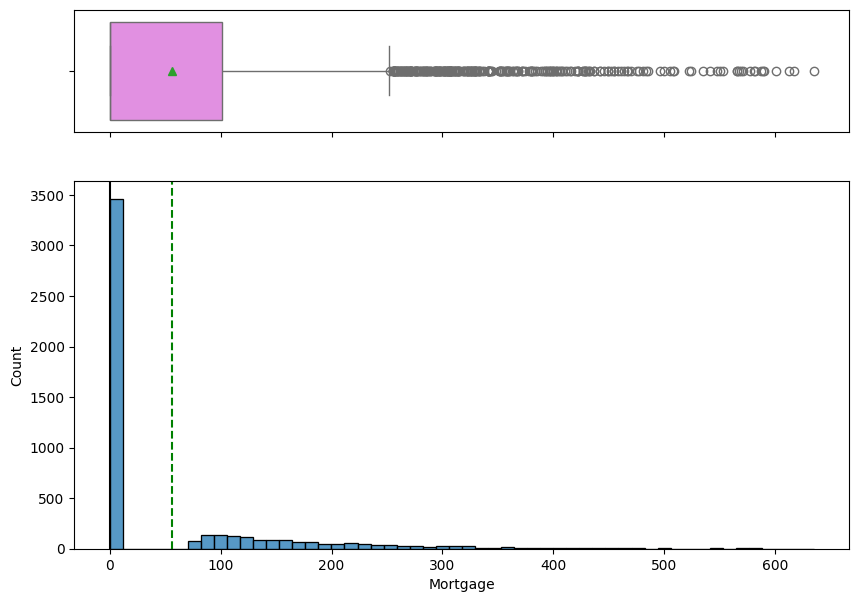

In [716]:
histogram_boxplot(data, 'Mortgage')

**2. How many customers have credit cards?**

**Answer** Number of customers having credit card:  1470

In [717]:
#How many customer have credit card
data.CreditCard.value_counts()
print("Number of customers having credit card: ",data.CreditCard.value_counts()[1])

Number of customers having credit card:  1470


**3. What are the attributes that have a strong correlation with the target attribute (personal loan)?**

**Answer:**  
1- 'Age' and 'Experience' have a strong positive correlation, which means as age increases, experience tends to increase as well.

2- 'Income' and 'CCAvg' have a noticeable positive correlation, indicating that higher income is often associated with higher credit card spending.

3- 'Age' and 'Securities Account' seem to have a slight negative correlation, meaning that older individuals might have less securities accounts.

4- Personal_Loan variable shows a positive correlation with Income. This is an important observation, indicating that customers with higher incomes are more likely to accept a personal loan.

<Axes: >

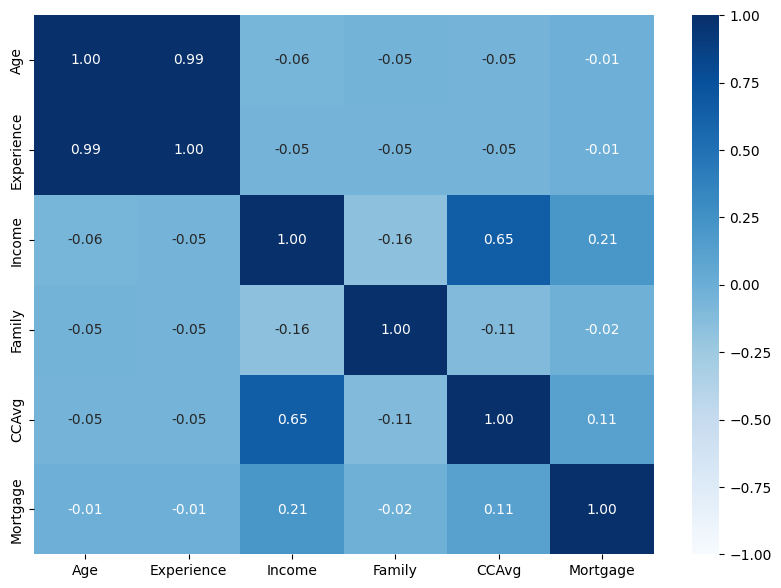

In [718]:
#Coorelation heatmap with Personal_Loan
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Blues")

**4. How does a customer's interest in purchasing a loan vary with their age?**

**Answer:**Below box plot for Personal_Loan versus Age suggests that there is no clear linear relationship or significant difference in age distribution between customers who accepted a personal loan and those who did not. The box plots for both categories of Personal_Loan appear to have similar median ages and interquartile ranges. This visualization shows that age does not seem to be a strong differentiating factor in predicting whether a customer will accept a personal loan or not. Both younger and older customers appear to have similar potentials to take out a loan.

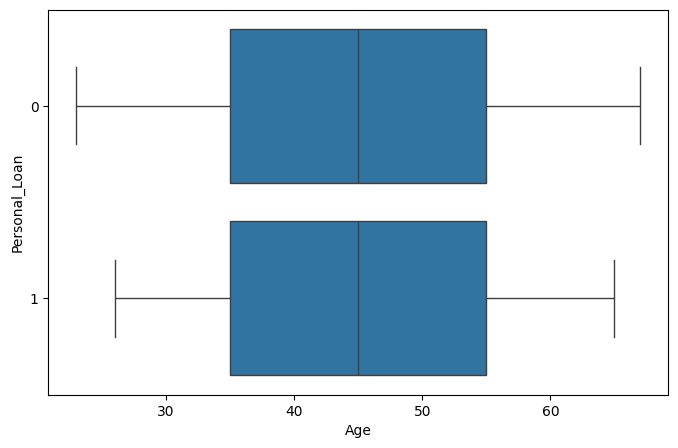

In [719]:
#Draw Box Plot Personal_Loan vs Age
plt.figure(figsize=(8, 5))
sns.boxplot(x="Age", y="Personal_Loan", data=data)
plt.show()

**5. How does a customer's interest in purchasing a loan vary with their education**

**Answer:**
1. Larger number of customers with education level 1(Undergrad) did not accept the loan.
2. Customers with higher Education levels (Graduate or Advanced/Professional) have a higher count of personal loan acceptances compared to those with an Undergraduate degree. This could be due to factors like higher income potential associated with higher education.

In [720]:
# Percentage of loan interest by education
edu_loan_pct = df.groupby('Education')['Personal_Loan'].mean() * 100
print("Percentage of customers interested in Personal Loan by Education:\n", edu_loan_pct)

Percentage of customers interested in Personal Loan by Education:
 Education
1     4.437023
2    12.972202
3    13.657562
Name: Personal_Loan, dtype: float64


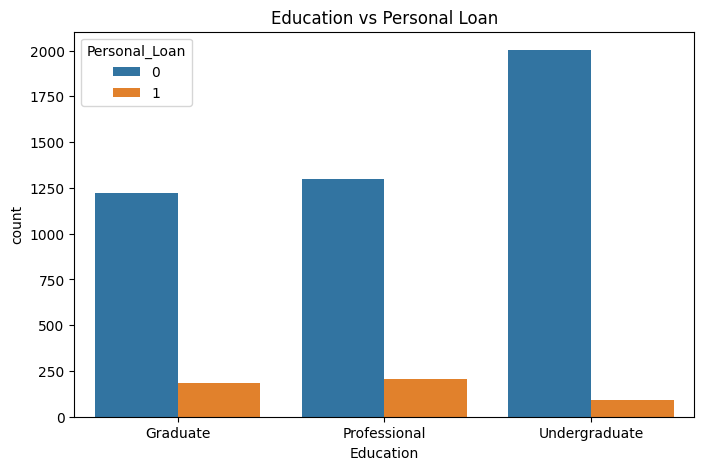

In [721]:
# Count plot for Education and Personal Loan
plt.figure(figsize=(8, 5))
sns.countplot(x="Education", hue="Personal_Loan", data=data)
plt.title("Education vs Personal Loan")
plt.show()


###Bivariate Analysis

In [722]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [723]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Data Preprocessing Contd...

####Outlier detection and treatment

In [724]:
from scipy.stats import zscore

# --- IQR Method ---
print("Detecting Outliers using IQR:")
print("-" * 50)

for col in data:
    if pd.api.types.is_numeric_dtype(data[col]):
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find indices of outliers for the current column using IQR
        outlier_indices = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index

        print(f"Number of outliers detected in '{col}' using IQR: {len(outlier_indices)}")

print("\n" + "="*50 + "\n") # Separator

# --- Z-score Method ---
print("Detecting Outliers using Z-score (threshold = 3):")
print("-" * 50)

threshold = 3 # Common threshold for Z-score

for col in data:
    if pd.api.types.is_numeric_dtype(data[col]):
        # Calculate Z-scores for the current column
        z_scores = np.abs(zscore(data[col]))

        # Find indices of data points where the absolute Z-score is greater than the threshold
        outlier_indices = data[z_scores > threshold].index
        print(f"Number of outliers detected in '{col}' using Z-score: {len(outlier_indices)}")

Detecting Outliers using IQR:
--------------------------------------------------
Number of outliers detected in 'Age' using IQR: 0
Number of outliers detected in 'Experience' using IQR: 0
Number of outliers detected in 'Income' using IQR: 96
Number of outliers detected in 'Family' using IQR: 0
Number of outliers detected in 'CCAvg' using IQR: 324
Number of outliers detected in 'Mortgage' using IQR: 291


Detecting Outliers using Z-score (threshold = 3):
--------------------------------------------------
Number of outliers detected in 'Age' using Z-score: 0
Number of outliers detected in 'Experience' using Z-score: 0
Number of outliers detected in 'Income' using Z-score: 2
Number of outliers detected in 'Family' using Z-score: 0
Number of outliers detected in 'CCAvg' using Z-score: 121
Number of outliers detected in 'Mortgage' using Z-score: 105


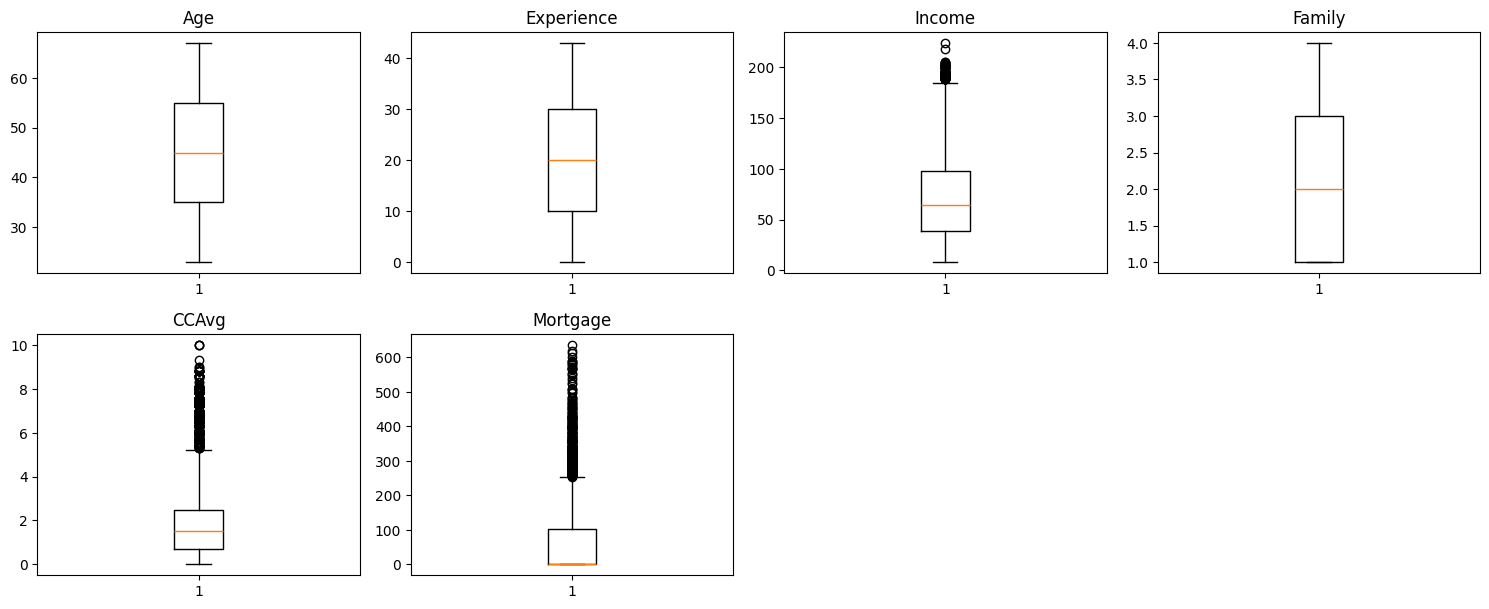

In [725]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There are quite a few outliers in the data.
However, we will not treat them as they are proper values

####Preparing data for modeling

In [726]:
#Education unique value count
data["Education"].value_counts()

,count
Education,
Undergraduate,2096
Professional,1501
Graduate,1403


In [727]:
# dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

#Shape of data in train and test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
#print percentage of classes in train and test
print("Percentage of classes in train set:")
print(y_train.value_counts(normalize=True))
print("\nPercentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (3500, 17)
Shape of X_test: (1500, 17)
Percentage of classes in train set:
Personal_Loan
0    0.907714
1    0.092286
Name: proportion, dtype: float64

Percentage of classes in test set:
Personal_Loan
0    0.895333
1    0.104667
Name: proportion, dtype: float64


**Class Distribution in Training Set:** In the training set, approximately 90.77% of the samples belong to class 0 (customers who did not accept a personal loan), and approximately 9.23% belong to class 1 (customers who accepted a personal loan). with the majority of customers not having taken a personal loan.

**Class Distribution in Test Set:** The class distribution in the testing set is similar to the training set, with about 89.53% in class 0 and 10.47% in class 1. This is a good sign, as it means the class proportions are roughly consistent between the training and testing data, which is important for evaluating the model's performance on unseen data.

## Model Building

### Model Evaluation Criterion

In [728]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [729]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Creating decision tree classifier for train

In [730]:
model0 = DecisionTreeClassifier(criterion="gini", random_state=42)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Checking model performance on training data

Creating confusion matrix

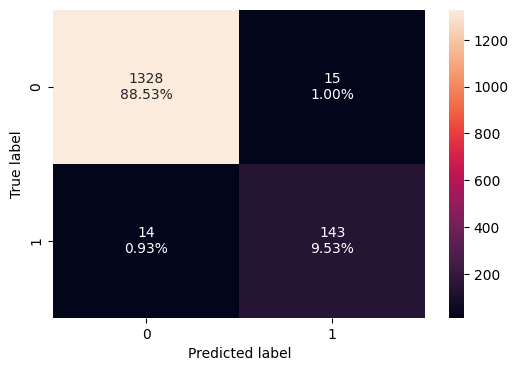

In [731]:
#Create confusion matrix on test set
confusion_matrix_sklearn(model0, X_test, y_test)

The confusion matrix shows that the model has correctly classified some classes, but there are some misclassifications indicating room for improvement.

In [732]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


Model has performed very well on training set, 0 errors on the training set, each sample has been classified correctly. High values for these metrics on the training set generally indicate that the model has learned to classify the data effectively. However, it is important to compare these metrics with the performance on the test set to assess whether the model is overfitting to the training data.

In [733]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Professional', 'Education_Undergraduate']


#### Visualizing the Decision Tree

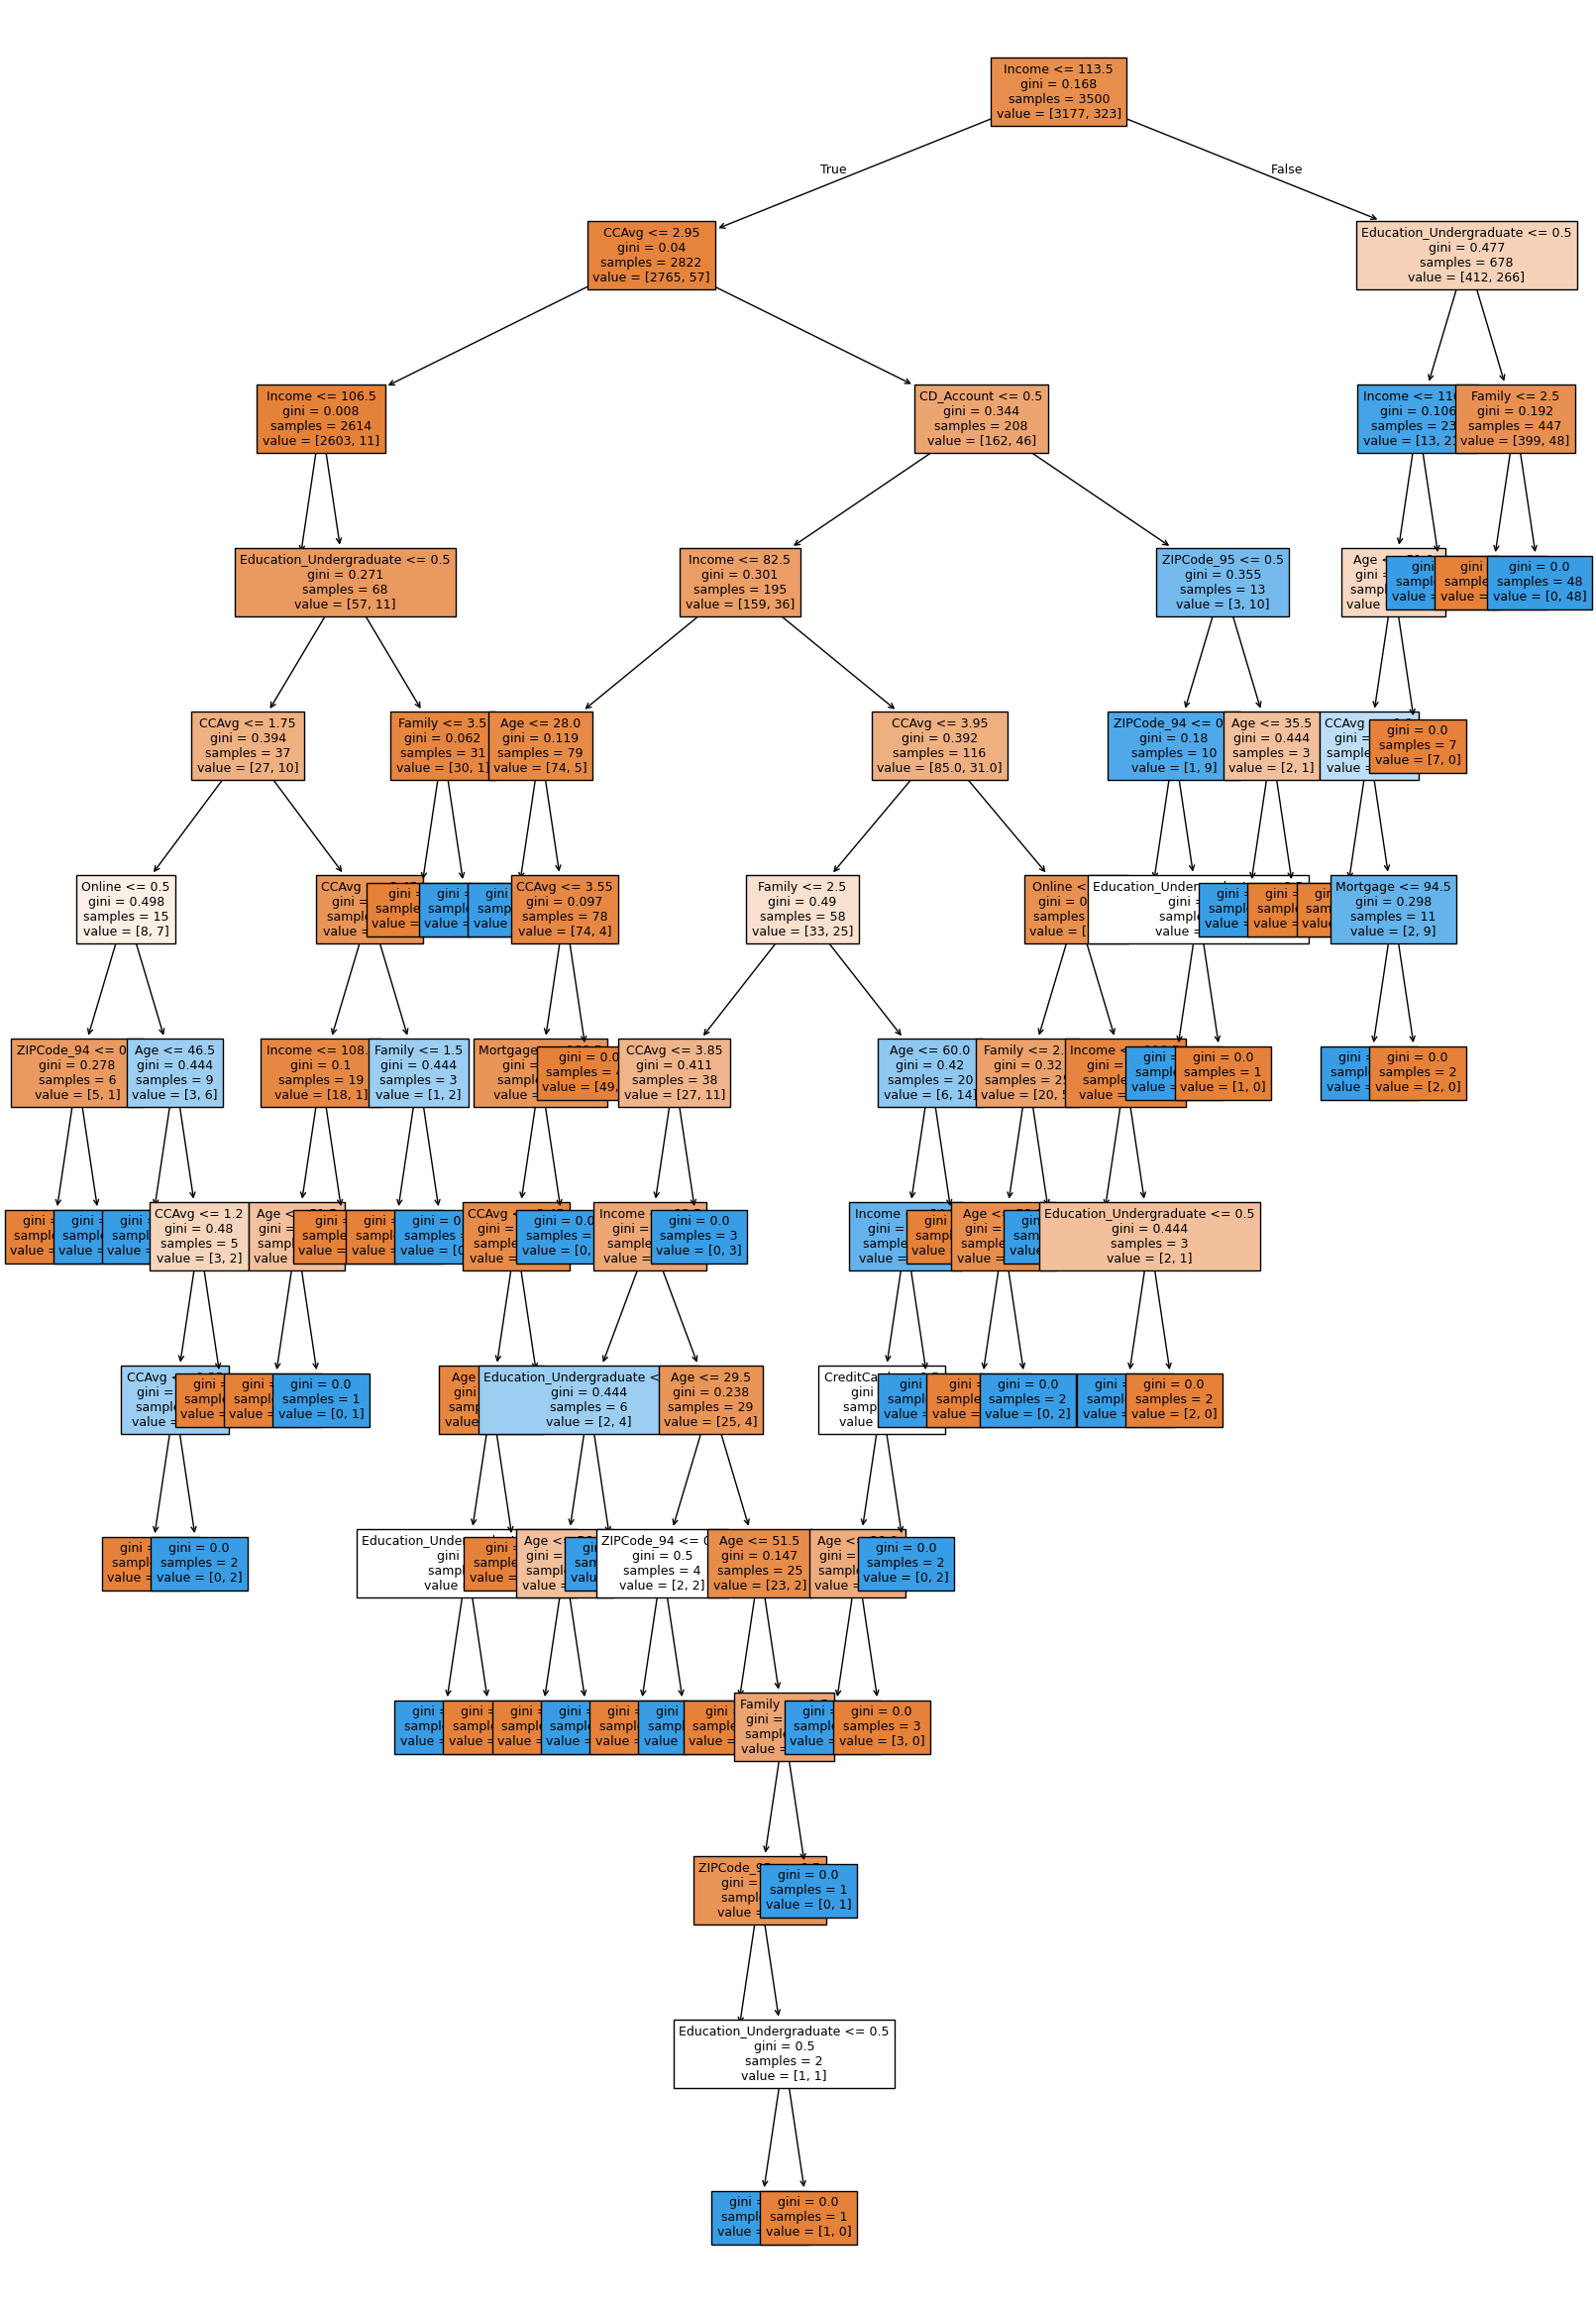

In [734]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model0,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

*


In [735]:
print(tree.export_text(model0, feature_names=feature_names, show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2546.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |--- CCAvg <= 1.75
|   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |--- ZIPCode_94 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_94 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |--- Age <= 46.50
|   |   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |   |   |   |   |--- Age >  46.50
|   |   |   |   |   |   |   |--- CCAvg <= 1.20
|   |   |   |   |   |   |   |   |--- CCAvg <= 0.35
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- CCAvg >  0.35
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |  

In [736]:
print(
    pd.DataFrame(model0.feature_importances_, columns=["Imp"], index=X_train.columns)
    .sort_values(by="Imp", ascending=False)
    )

                              Imp
Education_Undergraduate  0.376255
Income                   0.304528
Family                   0.169005
CCAvg                    0.068811
Age                      0.037718
CD_Account               0.014207
Mortgage                 0.011026
ZIPCode_94               0.007617
Online                   0.004467
ZIPCode_95               0.003806
CreditCard               0.002558
Securities_Account       0.000000
ZIPCode_91               0.000000
ZIPCode_93               0.000000
ZIPCode_92               0.000000
ZIPCode_96               0.000000
Education_Professional   0.000000


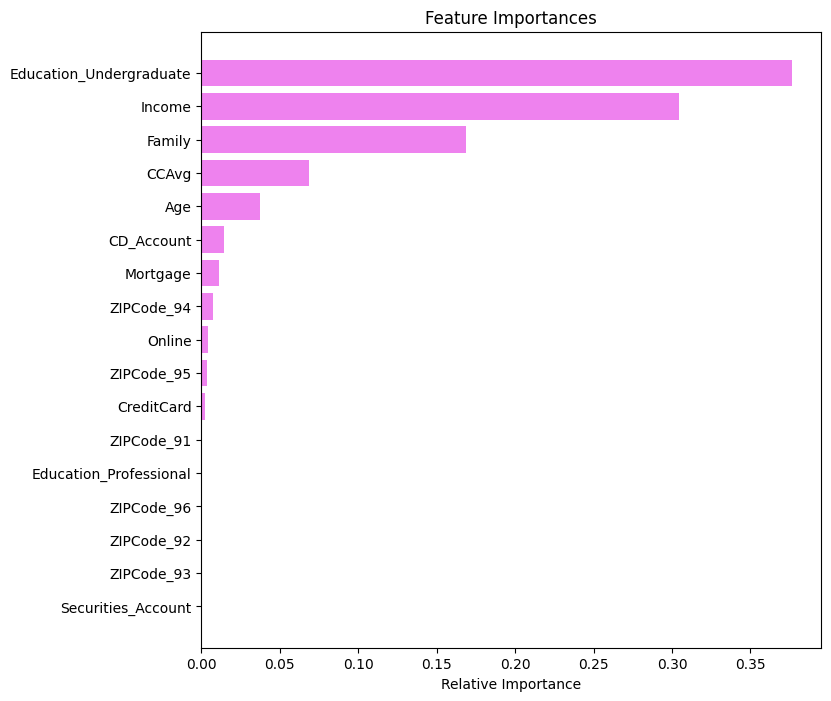

In [737]:
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

'Education_Undergraduate' appears to be the most important feature, followed by 'Income' and 'CCAvg'.

###Checking model performance on Test data

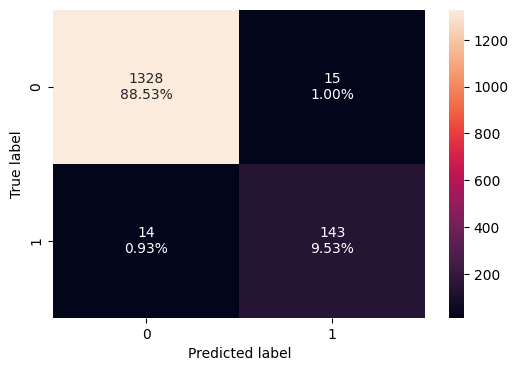

In [738]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [739]:
#Checking model performance on Test data
decision_tree_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.980667,0.910828,0.905063,0.907937


**Observation on training and test data**

The model has likely overfit the training data, as evidenced by the perfect training scores and the drop in performance on the test set. However, even with overfitting, the model demonstrates excellent generalization capabilities, achieving high accuracy, recall, and precision on the unseen test data.

Need focus on fixing the overfitting using pruning to potentially close the gap between training and test performance.

## Model Performance Improvement

#### Pre-pruning

* Hyperparameter tuning is crucial because it directly affects the performance of a model.
* Unlike model parameters which are learned during training, hyperparameters need to be set before training.
* Effective hyperparameter tuning helps in improving the performance and robustness of the model.
* The below custom loop for hyperparameter tuning iterates over predefined parameter values to identify the best model based on the metric of choice (recall score).

In [740]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 9, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)
            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [741]:
# creating an instance of the best model
model1 = best_estimator
# fitting the best model to the training data
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

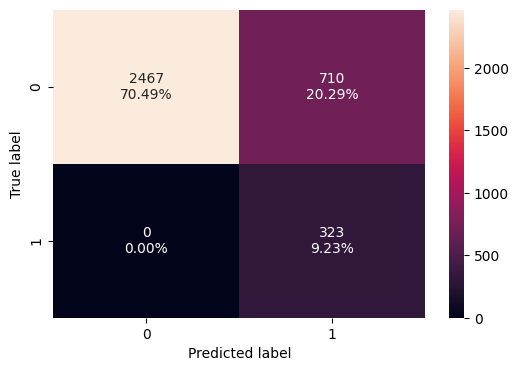

In [742]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [743]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.797143,1.0,0.312682,0.476401


#### Visualizing the Decision Tree

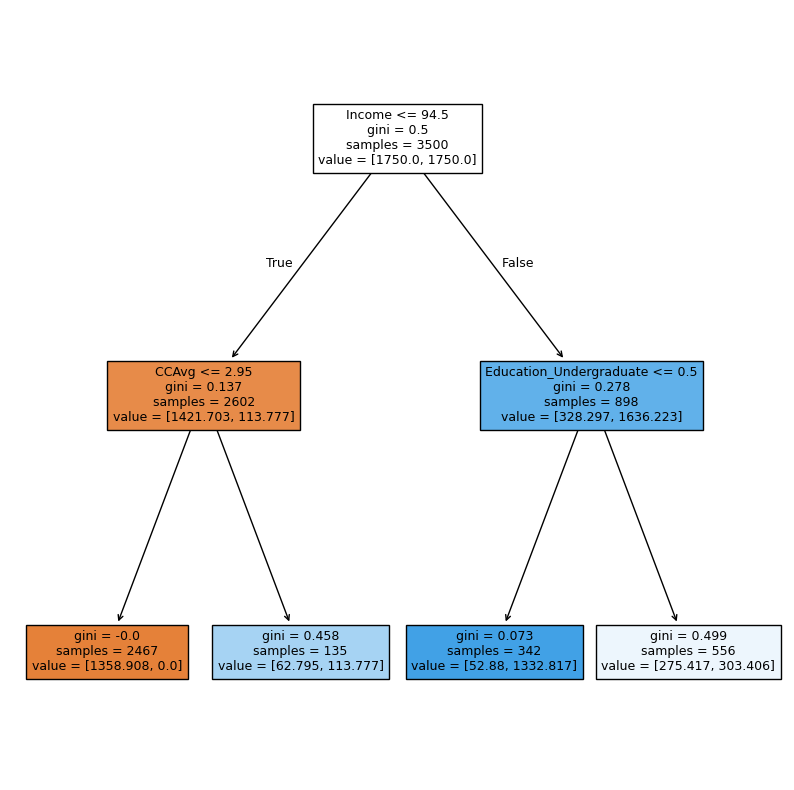

In [744]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [745]:
print(tree.export_text(model1, feature_names=feature_names, show_weights=True))

|--- Income <= 94.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1358.91, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [62.80, 113.78] class: 1
|--- Income >  94.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [52.88, 1332.82] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- weights: [275.42, 303.41] class: 1



**Observations:**

Tree is more simpler and small afte pre-pruning

In [746]:
print(
    pd.DataFrame(model1.feature_importances_, columns=["Imp"], index=X_train.columns)
    .sort_values(by="Imp", ascending=False)
    )

                              Imp
Income                   0.776182
Education_Undergraduate  0.122328
CCAvg                    0.101490
Age                      0.000000
Family                   0.000000
Securities_Account       0.000000
CD_Account               0.000000
Online                   0.000000
Mortgage                 0.000000
CreditCard               0.000000
ZIPCode_91               0.000000
ZIPCode_93               0.000000
ZIPCode_92               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
Education_Professional   0.000000


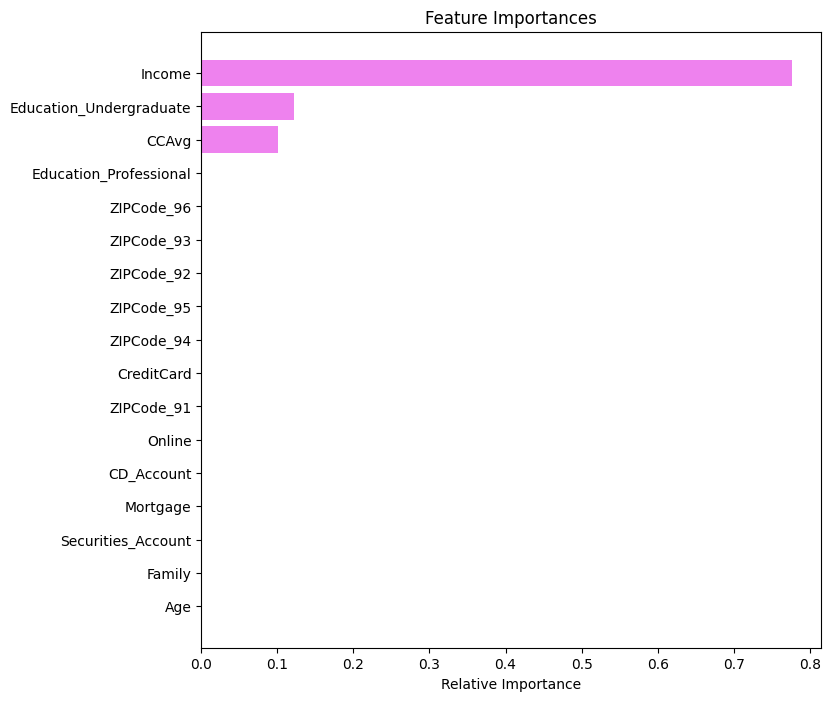

In [747]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation:**

Feature importance is limit to Income,Education_Undergraduate, CCAvg based on pre-pruning.

**Evaluation on test data**

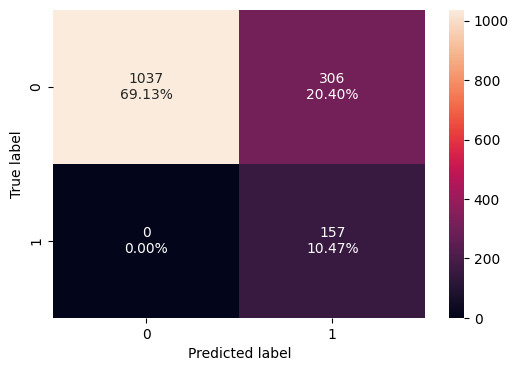

In [748]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [749]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.796,1.0,0.339093,0.506452


**Observation on model1 Performance (Training vs. Test):**

**Accuracy:** The accuracy is very similar between the training (0.797) and test (0.796) datasets. This indicates that the model's overall correct classification rate is consistent on both train and test data.

**Recall:** The model achieves a perfect Recall of 1.0 on both the training and test sets. This is a significant observation. It means the model successfully identified every single customer who accepted a personal loan in both the training and test data. In a business context this perfect recall is highly desirable.

**Precision:** The Precision score is relatively low on both the training (0.313) and test (0.339) sets. While the test precision is slightly better, it still means that a significant proportion of the customers the model predicts will take a loan actually do not.

**F1-Score:** The F1-Scores are also similar between training (0.476) and test (0.506), reflecting the consistent performance in terms of the balance between Precision and Recall.

####**Post-Pruning**

In [750]:
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

This code performs cost complexity pruning on a decision tree model. It calculates different alpha values and their associated impurities. Then, it uses this data to determine the optimal alpha value for pruning the decision tree model, aiming to improve performance and prevent overfitting.

In [751]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000250,0.000500
2,0.000257,0.001014
3,0.000271,0.001556
4,0.000275,0.002105
5,0.000276,0.002657
6,0.000277,0.003211
7,0.000343,0.003896
8,0.000381,0.004277
9,0.000381,0.005039


This DataFrame shows the relationship between the alpha values and the impurity of the decision tree. As the alpha value increases, the impurity tends to decrease, indicating that the tree is being pruned more, making it less complex. This data helps in finding the right balance for pruning, to avoid overfitting and maintain good performance on new data.

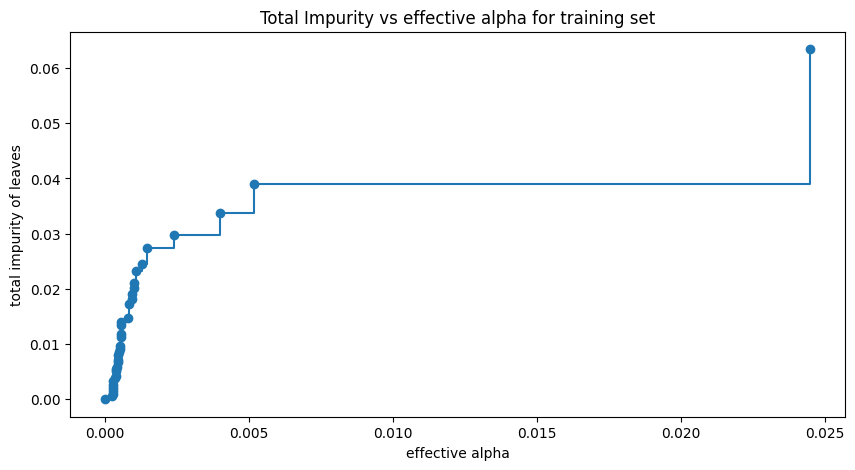

In [752]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [753]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05206542558865251


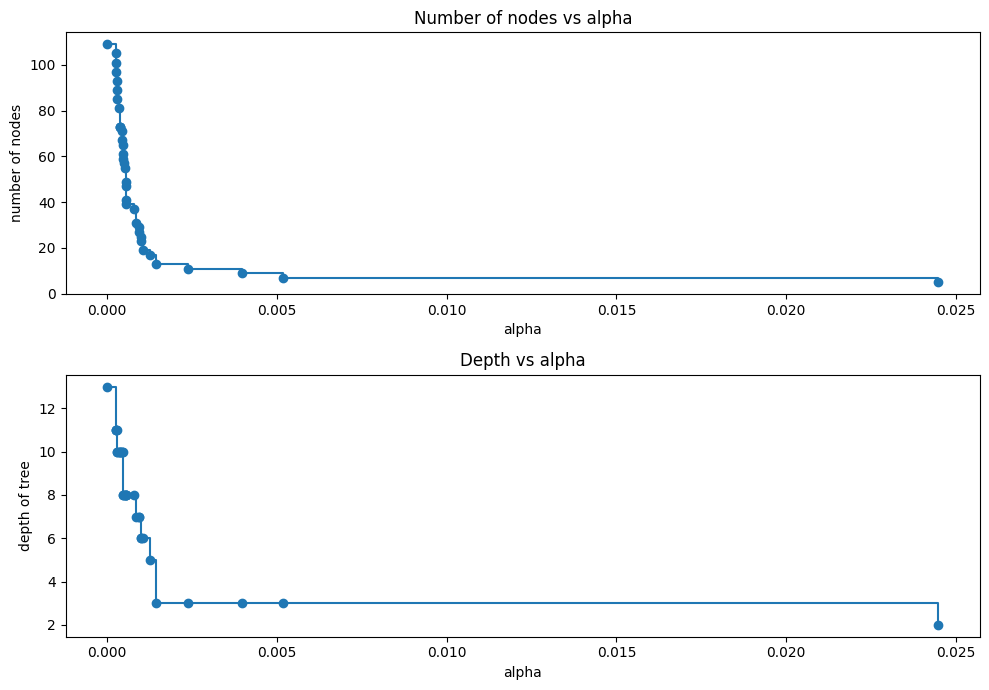

In [754]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [755]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

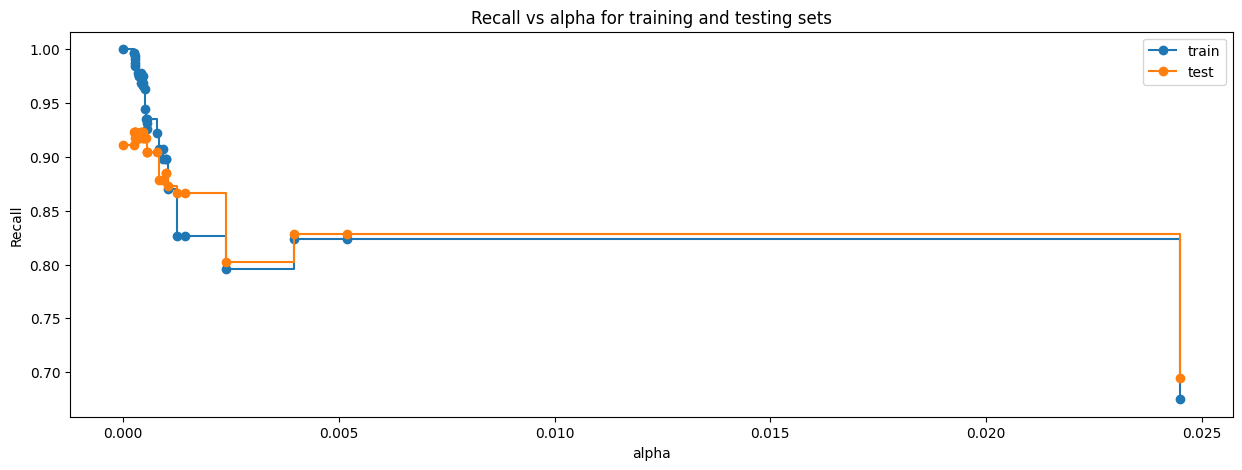

In [756]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Based on the plot, we can observe that as the alpha value increases, both the training and testing recall scores tend to decrease. This suggests that as we increase the complexity parameter alpha, the model becomes simpler, which can lead to a lower recall performance on both the training and testing data.

In [757]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
model2 = best_model
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0002571428571428572),
                       random_state=42)


The post-pruned model exhibits the same performance and feature importance as the initial model without pruning. This indicates that the pruning process, in this case, did not significantly alter the model's complexity or its ability to make predictions.

In [758]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha = ccp_alpha, class_weight={0: 0.15, 1: 0.85}, random_state=42
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.05206542558865251),
                       class_weight={0: 0.15, 1: 0.85}, random_state=42)

####Checking performance on training data

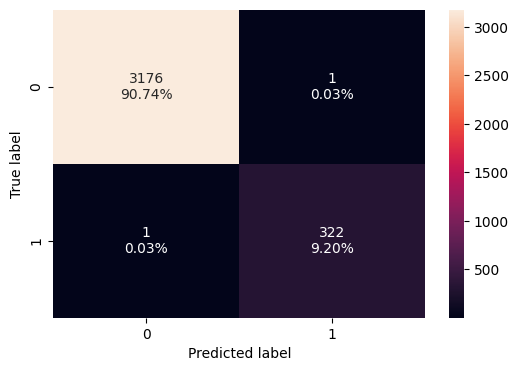

In [759]:
#confusion matrix on best_model
confusion_matrix_sklearn(model2, X_train, y_train)

In [760]:
#Model performance
decision_tree_tune_post_train = model_performance_classification_sklearn(model2, X_train, y_train)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.999429,0.996904,0.996904,0.996904


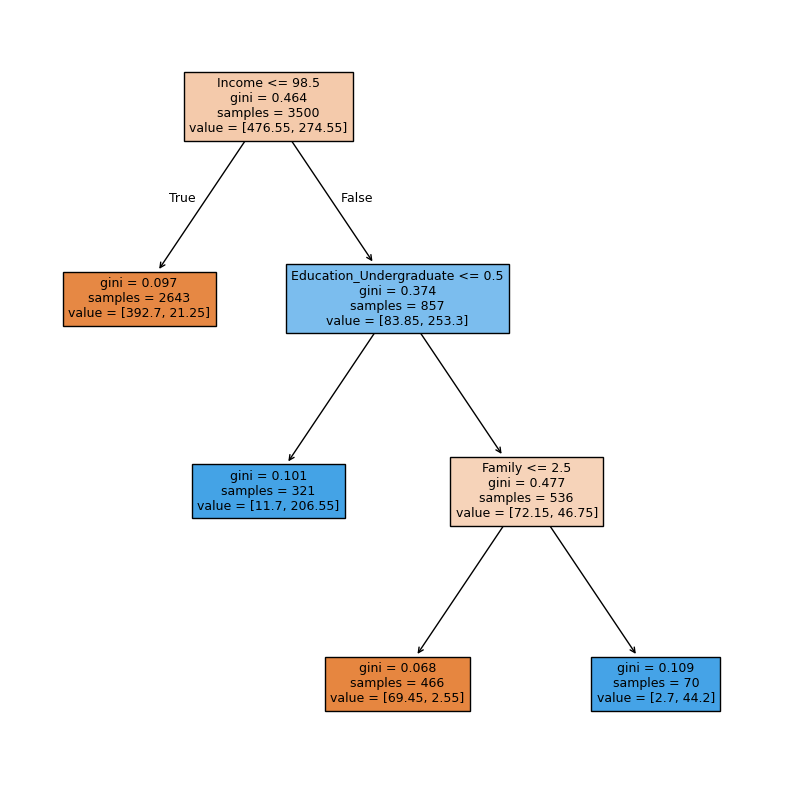

In [761]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [762]:
print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- weights: [392.70, 21.25] class: 0
|--- Income >  98.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [11.70, 206.55] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [69.45, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [2.70, 44.20] class: 1



In [763]:
print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Income                   0.659900
Education_Undergraduate  0.170741
Family                   0.169358
Age                      0.000000
CCAvg                    0.000000
Securities_Account       0.000000
CD_Account               0.000000
Online                   0.000000
Mortgage                 0.000000
CreditCard               0.000000
ZIPCode_91               0.000000
ZIPCode_93               0.000000
ZIPCode_92               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
Education_Professional   0.000000


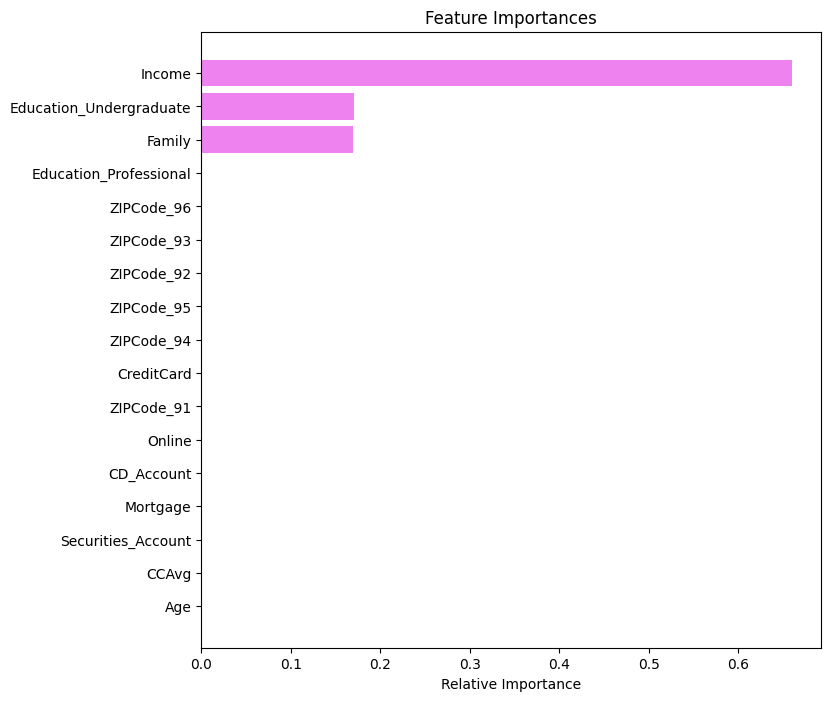

In [764]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Feature importance is limit to Income,Education_Undergraduate, Family based on post-pruning.

**Checking performance on test data**

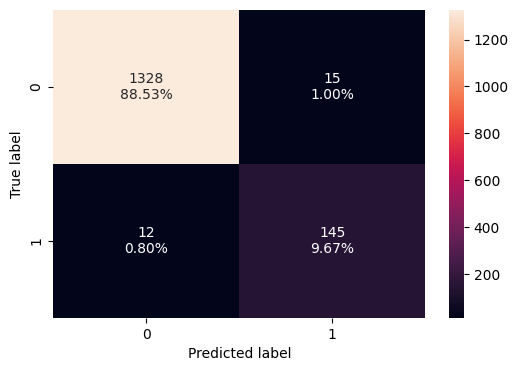

In [765]:
#Checking performance on test data
confusion_matrix_sklearn(model2, X_test, y_test)

In [766]:
decision_tree_tune_post_test = model_performance_classification_sklearn(model2, X_test, y_test)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.982,0.923567,0.90625,0.914826


## Model Performance Comparison and Final Model Selection

In [767]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.797143,0.999429
Recall,1.0,1.000000,0.996904
Precision,1.0,0.312682,0.996904
F1,1.0,0.476401,0.996904


In [768]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.980667,0.796000,0.982000
Recall,0.910828,1.000000,0.923567
Precision,0.905063,0.339093,0.906250
F1,0.907937,0.506452,0.914826


**Default Decision Tree:** Default Decision Tree perfect performance (1.0 for all metrics) on the training data, indicating it has fully memorized the training set. However, its performance drops slightly on the test data (Accuracy 0.981, Recall 0.911, Precision 0.905, F1 0.908). The comparison of training and test scores clearly demonstrates the problem of overfitting with the default Decision Tree. Both pre-pruning and post-pruning were applied to mitigate this.

**pre-pruning** Shows a considerable drop in training and test across most metrics, but the training performance itself is already significantly lower than the other models. its low Precision on both sets means it makes a large number of False Positive predictions.

**post-pruning** strategy near-perfect performance on the training data (Accuracy 0.999, Recall 0.997, Precision 0.997, F1 0.997), performance on the test data is the highest among the three models (Accuracy 0.982, Recall 0.924, Precision 0.906, F1 0.915). This indicates that the post-pruning effectively reduced overfitting compared to the default tree, this proves to be the most effective in this case.

**Conclusion:**
The **post-pruning** model offers a strong balance between identifying most potential loan customers (high Recall) and minimizing false positives (high Precision). post-pruned model is best choice among the three evaluated models for predicting personal loan acceptance.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___

# **Targeting Strategy:**

**Focus on High-Income Customers:** The analysis clearly showed that Income is the strongest predictor of personal loan acceptance. The bank should prioritize targeting customers with higher annual incomes for personal loan campaigns.

**Target Larger Families:** The analysis suggested that customers with family sizes of 3 and 4 are more likely to accept personal loans. This segment could be a valuable target group.

**Prioritize Specific Education Levels:** Customers with Graduate and Advanced/Professional education levels have a higher chance of accepting personal loans. Marketing efforts could be more focused on these groups.

**Consider Credit Card Usage (CCAvg):** Customers with higher average credit card spending also show a higher change to accept personal loans. Target high-income customers who also have high credit card spending.

**Leverage CD Account Ownership:** Customers with CD accounts are more likely to accept personal loans. This is a strong indicator that should be used to identify potential loan customers.

# **Marketing strategy:**
Marketing team should highlight benefits to target segments, marketing  should emphasize how a personal loan can benefit the identified segments. For example, for larger families, highlight how a loan can help with expenses like education or home improvements. For high-income customers, focus on the flexibility and potential uses of a personal loan.


# **Model Implementation:**
The bank should consider implementing post-pruned Decision Tree model which demonstrated the best performance to segment potential customers and identify those with the highest probability of accepting a personal loan.

Also, continuously monitor the model's performance in a production environment and retrain it periodically with new data to ensure its predictions remain accurate as customer behavior and economic conditions change.

In [769]:
#!jupyter nbconvert AIML_ML_Project_full_code_notebook.ipynb --to html